In [2]:
#install.packages("ISLR")
library(ISLR)

In [3]:
nci.labs <- NCI60$labs
nci.data <- NCI60$data

In [4]:
dim(nci.data)

[1]   64 6830

In [5]:
str(NCI60)

List of 2
 $ data: num [1:64, 1:6830] 0.3 0.68 0.94 0.28 0.485 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:64] "V1" "V2" "V3" "V4" ...
  .. ..$ : chr [1:6830] "1" "2" "3" "4" ...
 $ labs: chr [1:64] "CNS" "CNS" "CNS" "RENAL" ...


In [6]:
table(nci.labs)

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

In [7]:
# scale the data set
sd.data = scale(nci.data)# 标准化数据 即(x-μ)/σ
head(sd.data)

,1,2,3,4,5,6,7,8,9,10,⋯,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.7229554,1.594614647,1.3152906,1.3450554,-0.6001006,-0.21892339,0.8910931,-0.8619276,-1.05030928,-1.0508663,⋯,-1.0225790,-0.3557061,-0.2363767,-0.38940912,0.82484955,-0.1987154,-0.07507424,0.516807513,-0.8298055,-1.3738144015
V2,1.5838967,1.739790603,0.4382214,0.6489885,0.9047460,1.63581692,1.8351898,2.2091606,-0.09510822,-0.4742284,⋯,-0.2139660,-0.6208122,-0.4860952,-0.79450988,0.01371002,-1.0967426,-1.10890935,-0.817191980,-0.9181664,-1.4202189920
V3,2.1731106,-0.016089747,-0.3463542,0.2643754,-1.3010255,-0.01917014,0.1896859,1.9730294,1.00007333,0.7104027,⋯,0.4487271,-0.2496774,-0.9230069,-0.86197548,-0.57894050,-0.3285445,-0.07507424,0.008636105,-0.9534144,-0.0950859842
V4,0.6776381,-0.372557113,1.6153098,-0.4408142,1.2346734,-0.01917014,0.4055035,0.7917973,0.04478144,0.1181175,⋯,-1.3033631,-0.4528990,-0.4058049,-0.08561646,-0.70372184,-0.4908310,-1.02617353,1.545854615,-0.6885383,-0.8238949267
V5,1.1421409,-0.577195786,0.9575754,1.1298352,0.3585172,-0.03343823,0.1761973,0.3931315,0.54572719,2.2924275,⋯,0.7126636,-1.0404746,-0.7223682,-0.55255703,0.83264834,0.4882972,-0.07507424,1.107556776,0.5210626,0.0009842855
V6,0.7456141,-0.002887252,-0.1848054,-0.1202735,-0.4764080,-1.56012378,-1.7796496,-1.6592592,-1.79590295,-0.4118218,⋯,-0.5733252,-0.3557061,-0.9230069,-2.54971249,-2.32588002,-0.5990220,0.50384262,0.529511799,0.7417926,-0.0950859842


In [8]:
# Euclidean disdance
#method	 the distance measure to be used. 
#This must be one of "euclidean", "maximum", 
#"manhattan", "canberra", "binary" or "minkowski". 
data.dist = dist(sd.data,method ="euclidean" )

In [ ]:
#四种算类于类之间距离的方法
par(mfrow=c(1,1))
#default是complete 是找maximize
plot(hclust(data.dist), 
     labels=nci.labs,
     main="Complete Linkage",
     xlab="", sub="",ylab="")
plot(hclust(data.dist, method="average"),
     labels=nci.labs, 
     main="Average Linkage",
     xlab="", sub="",ylab="")
#single 是找minimize
plot(hclust(data.dist, method="single"), 
     labels=nci.labs, 
     main="Single Linkage",
     xlab="", sub="",ylab="")
plot(hclust(data.dist, method="centroid"), 
     labels=nci.labs, 
     main="centroid Linkage", 
     xlab="", sub="",ylab="")

           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

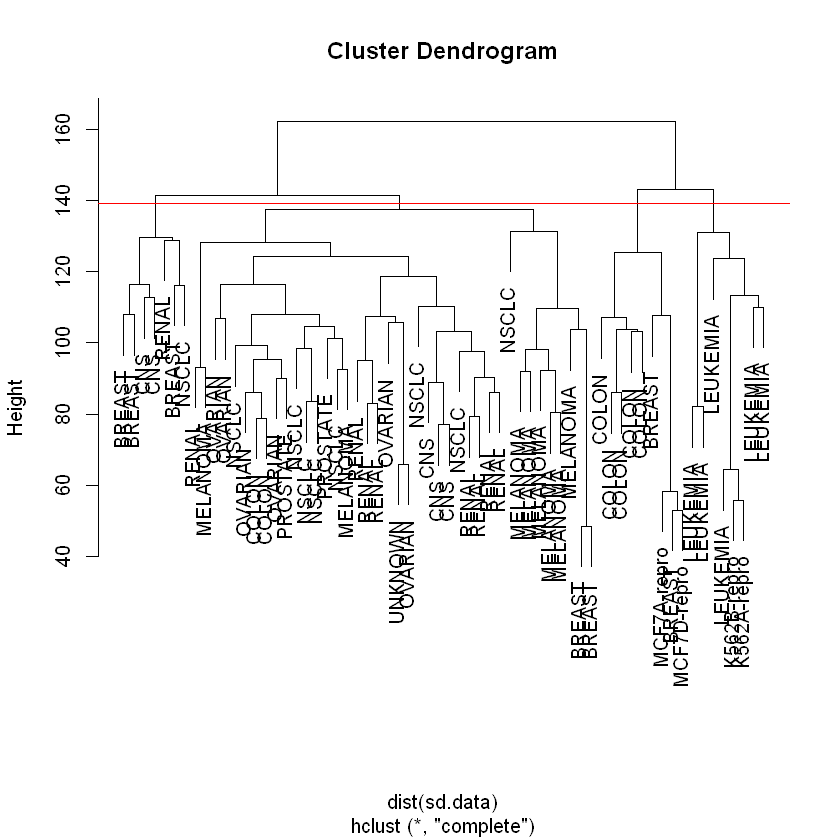

In [9]:
#挑一种方法去做聚类并pruning和visualize
hc.out=hclust(dist(sd.data),method ="complete")
hc.clusters=cutree(hc.out,4)
table(hc.clusters,nci.labs)
plot(hc.out, labels=nci.labs)
abline(h=139, col="red")

In [ ]:
#kmeans
set.seed(2)
km.out=kmeans(sd.data, 4, nstart=20)
km.clusters=km.out$cluster
km.clusters

#compare the kmeans and clustering
table(km.clusters,hc.clusters)


   nci.labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci.labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0

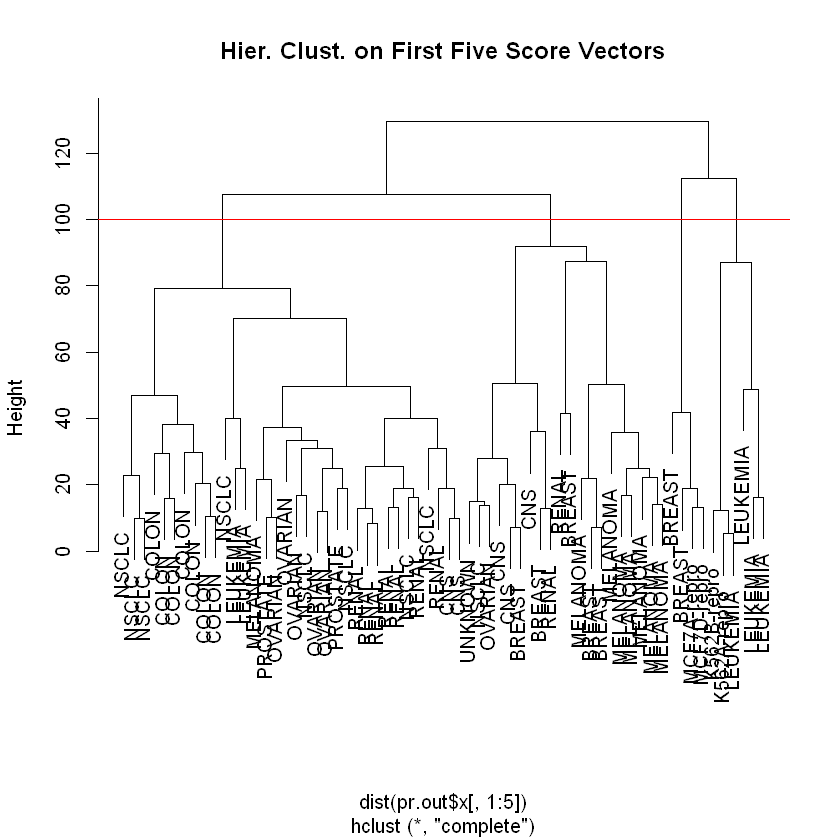

In [10]:
#也可以先PCA 再降维
pr.out=prcomp(nci.data, scale=TRUE)

xhc.out=hclust(dist(pr.out$x[,1:5]))
plot(xhc.out, labels=nci.labs, main="Hier. Clust. on First Five Score Vectors")
abline(h=100, col="red")
table(cutree(xhc.out,4), nci.labs)

In [ ]:
#降到俩个维度聚类
xhc.out=hclust(dist(pr.out$x[,1:2]))
plot(xhc.out, labels=nci.labs, 
     main="Hier. Clust. on First Five Score Vectors")
abline(h=80, col="red")
xhc.clusters = cutree(xhc.out,3)
xhc.clusters

plot(pr.out$x[,1:2], col=(xhc.clusters+1), 
     main="reduce dimension to 2 hier. Clustering Results with K=3", 
     xlab="", ylab="", pch=20, cex=2)

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   2   2   2   2   2   2   2 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
  2   1   2   2   2   1   2   2   2   2   2   1   1   1   1   3   3   3   3   3 
V61 V62 V63 V64 
  3   3   3   3

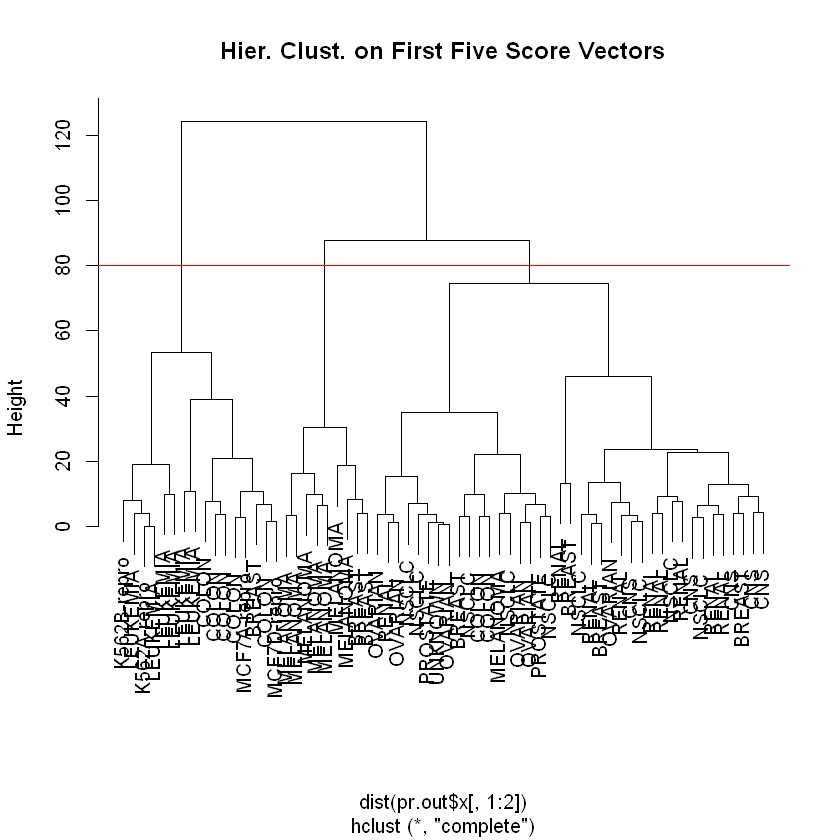

In [11]:
#降到俩个维度聚类
xhc.out=hclust(dist(pr.out$x[,1:2]))
plot(xhc.out, labels=nci.labs, 
     main="Hier. Clust. on First Five Score Vectors")
abline(h=80, col="red")
xhc.clusters = cutree(xhc.out,3)
xhc.clusters

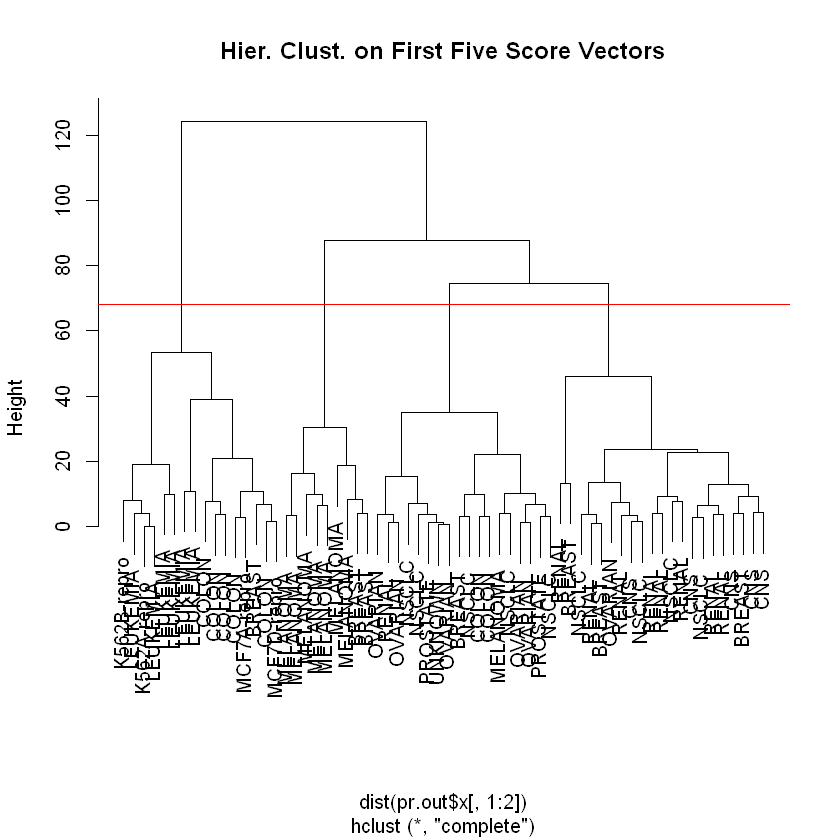

In [12]:
#降到俩个维度聚类
xhc.out=hclust(dist(pr.out$x[,1:2]))
plot(xhc.out, labels=nci.labs, 
     main="Hier. Clust. on First Five Score Vectors")
abline(h=68, col="red")


In [13]:
xhc.clusters = cutree(xhc.out,4)
table(xhc.clusters)

xhc.clusters
 1  2  3  4 
21 18 16  9 

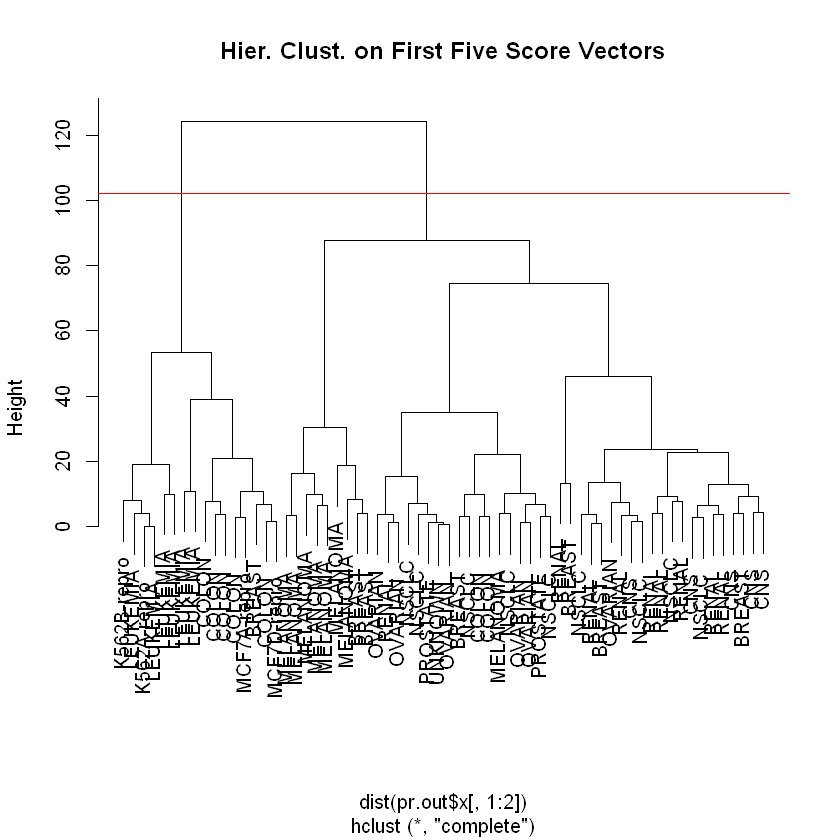

In [14]:
#降到俩个维度聚类
xhc.out=hclust(dist(pr.out$x[,1:2]))
plot(xhc.out, labels=nci.labs, 
     main="Hier. Clust. on First Five Score Vectors")
abline(h=102, col="red")


V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
  1   1   1   2   2   2   2   1   2   2   2   2   2   2   2   2   2   2   2   2 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   1   1   1   1   1 
V61 V62 V63 V64 
  1   1   1   1

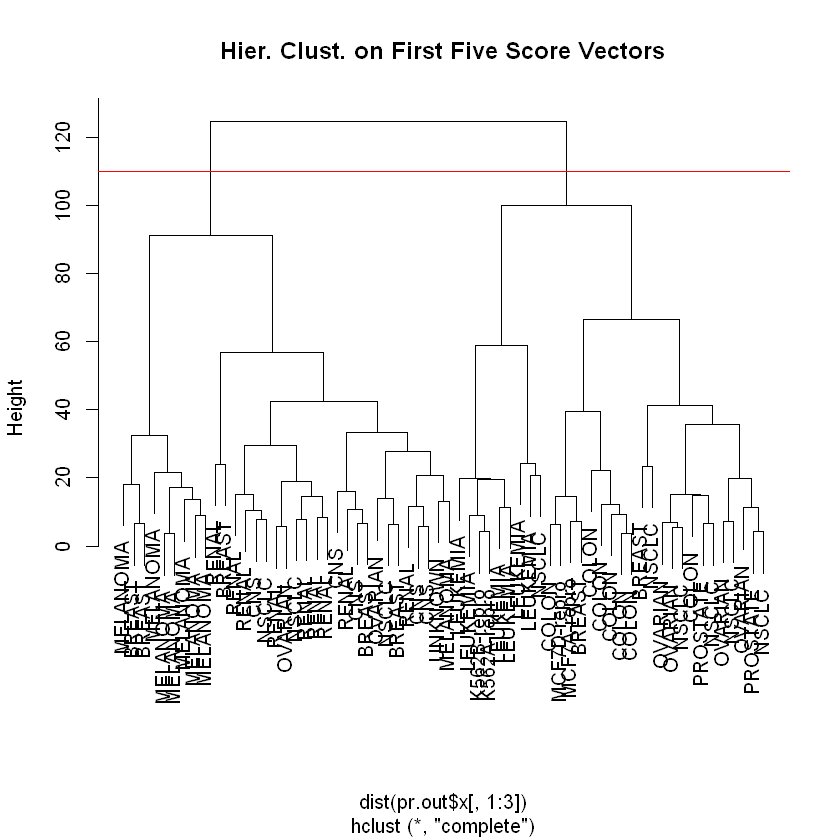

In [15]:
#降到3个维度聚类
xhc.out=hclust(dist(pr.out$x[,1:3]))
plot(xhc.out, labels=nci.labs, 
     main="Hier. Clust. on First Five Score Vectors")
abline(h=110, col="red")
xhc.clusters = cutree(xhc.out,2)
xhc.clusters